In [13]:
#importing the necessary libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [14]:
#loading the file into a pandas dataframe 
df = pd.read_csv('voyages.csv')
df

,departure_date_utc,arrival_date_utc,status,commodity_origin_iso2,commodity_destination_iso2,commodity_destination_region,commodity,value_tonne,value_eur
0,2022-01-20T04:34:00Z,2022-01-26T15:32:00Z,completed,RU,RU,Others,oil_or_chemical,6670.0,3.777081e+06
1,2022-01-20T02:12:00Z,2022-02-01T12:03:00Z,completed,KZ,ES,EU,crude_oil,115831.0,6.538241e+07
2,2022-01-19T19:57:00Z,2022-01-27T20:41:00Z,completed,RU,TR,Turkey,oil_or_chemical,6573.0,3.942407e+06
3,2022-01-19T15:06:00Z,2022-01-24T14:24:00Z,completed,RU,PL,EU,oil_or_chemical,38734.0,2.419163e+07
4,2022-01-19T13:43:00Z,2022-01-27T16:01:00Z,completed,RU,FR,EU,oil_or_chemical,40149.0,2.507538e+07
...,...,...,...,...,...,...,...,...,...
30624,2023-05-16T09:39:00Z,NaN,ongoing,TR,MD,Others,oil_or_chemical,7084.0,3.926385e+06
30625,2023-05-23T13:03:00Z,NaN,ongoing,RU,JP,Others,lng,78311.0,3.423389e+07
30626,2023-05-23T16:52:00Z,NaN,ongoing,RU,NaN,NaN,oil_products,7017.0,3.784801e+06
30627,2023-05-23T16:41:00Z,NaN,ongoing,RU,CN,China,coal,75390.0,1.242932e+07


In [15]:
#checking the column datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30629 entries, 0 to 30628
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   departure_date_utc            30629 non-null  object 
 1   arrival_date_utc              26846 non-null  object 
 2   status                        30629 non-null  object 
 3   commodity_origin_iso2         30629 non-null  object 
 4   commodity_destination_iso2    28965 non-null  object 
 5   commodity_destination_region  28971 non-null  object 
 6   commodity                     30629 non-null  object 
 7   value_tonne                   29917 non-null  float64
 8   value_eur                     29917 non-null  float64
dtypes: float64(2), object(7)
memory usage: 2.1+ MB


In [16]:
#converting departure and arrival date columns to datetime format 

df['departure_date_utc'] = pd.to_datetime(df['departure_date_utc'])
df['arrival_date_utc'] = pd.to_datetime(df['arrival_date_utc'])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30629 entries, 0 to 30628
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   departure_date_utc            30629 non-null  datetime64[ns, UTC]
 1   arrival_date_utc              26846 non-null  datetime64[ns, UTC]
 2   status                        30629 non-null  object             
 3   commodity_origin_iso2         30629 non-null  object             
 4   commodity_destination_iso2    28965 non-null  object             
 5   commodity_destination_region  28971 non-null  object             
 6   commodity                     30629 non-null  object             
 7   value_tonne                   29917 non-null  float64            
 8   value_eur                     29917 non-null  float64            
dtypes: datetime64[ns, UTC](2), float64(2), object(5)
memory usage: 2.1+ MB


# **Exploratory Data Analysis**

In [17]:
#checking for null values in the datasets 
df.isna().sum() 

departure_date_utc                 0
arrival_date_utc                3783
status                             0
commodity_origin_iso2              0
commodity_destination_iso2      1664
commodity_destination_region    1658
commodity                          0
value_tonne                      712
value_eur                        712
dtype: int64

In [18]:
#inspecting the null values in value tonne and value eur to draw reasonable inference
filtered_df = df[df['value_tonne'].isnull() | df['value_eur'].isnull()]
filtered_df

,departure_date_utc,arrival_date_utc,status,commodity_origin_iso2,commodity_destination_iso2,commodity_destination_region,commodity,value_tonne,value_eur
11014,2022-06-02 07:12:00+00:00,NaT,undetected_arrival,IN,NaN,NaN,oil_products,NaN,NaN
11063,2022-02-11 16:12:00+00:00,NaT,ongoing,RU,NaN,NaN,oil_or_chemical,NaN,NaN
11064,2022-02-03 07:52:00+00:00,NaT,undetected_arrival,RU,NaN,NaN,oil_products,NaN,NaN
11065,2022-03-31 20:26:00+00:00,NaT,ongoing,IN,NaN,NaN,oil_products,NaN,NaN
11066,2022-03-13 19:03:00+00:00,NaT,ongoing,IN,NaN,NaN,oil_products,NaN,NaN
...,...,...,...,...,...,...,...,...,...
28608,2023-03-28 21:53:00+00:00,NaT,undetected_arrival,RU,NaN,NaN,crude_oil,NaN,NaN
29408,2023-04-26 15:08:00+00:00,NaT,ongoing,RU,NaN,NaN,oil_or_chemical,NaN,NaN
29474,2023-04-28 10:33:00+00:00,NaT,ongoing,RU,NaN,NaN,oil_or_chemical,NaN,NaN
30475,2023-05-21 12:55:00+00:00,NaT,ongoing,RU,NaN,NaN,crude_oil,NaN,NaN


In [19]:
#checking the status of null value entries. They are not completed yet, which explains the unavailability of some data
filtered_df['status'].value_counts()

undetected_arrival    493
ongoing               219
Name: status, dtype: int64

In [20]:
#checking for duplicate values in dataset. Duplicates are retained since there is no unique identifier such as a shipmentID. It is not impossible that 10 shipments have the same value even if is unlikely
df.duplicated().sum()

10

In [21]:
#checking for outliers in numerical variables using zscore . There are none

zscore_cols = ['value_tonne', 'value_eur']
z = np.abs(stats.zscore(df[zscore_cols]))
threshold = 3
print(np.where(z > 3))

(array([], dtype=int64), array([], dtype=int64))


# **Data Visualisation**

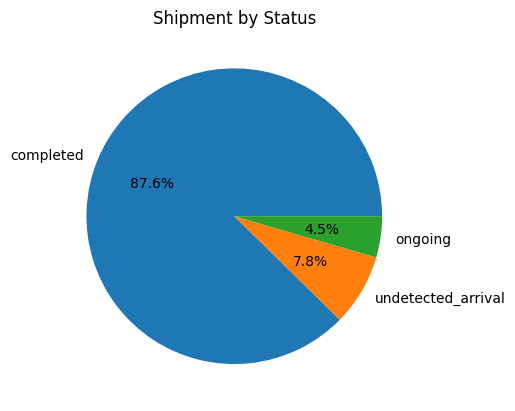

In [22]:
#visualising the distribution of shipment by status 

statuscount = df['status'].value_counts()


#plotting on a pie chart 
fig, ax = plt.subplots()
ax.pie(statuscount.values, labels=statuscount.index, autopct='%1.1f%%')

# Set the plot title
ax.set_title("Shipment by Status")

# Show the plot
plt.show()

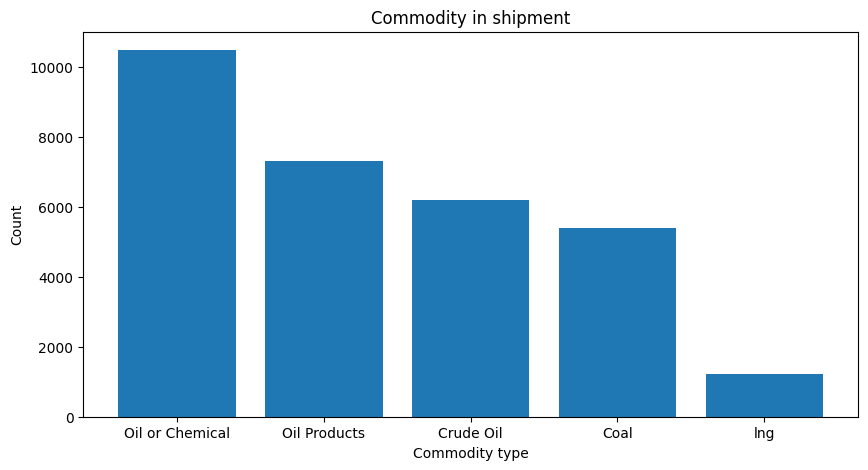

In [23]:
#visualising the number of shipments by commodity type

df['commodity']=df['commodity'].replace({'oil_or_chemical':'Oil or Chemical','oil_products':'Oil Products','crude_oil':'Crude Oil',
                                                                     'coal':'Coal'})
commoditycount = df['commodity'].value_counts()

plt.figure(figsize = (10,5))
plt.bar(commoditycount.index, commoditycount.values)
plt.title('Commodity in shipment')
plt.xlabel('Commodity type')
plt.ylabel('Count')
plt.show()

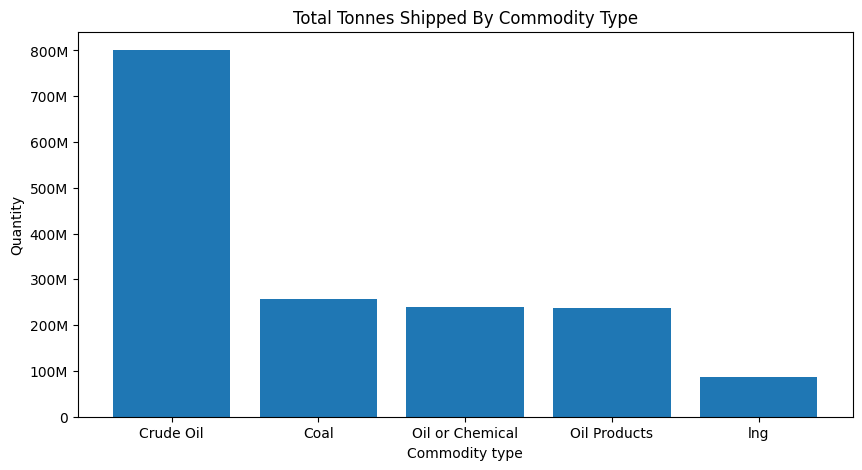

In [24]:

# Visualizing the number of tonnes in total shipped for each commodity type
commoditybytonnes = df.groupby('commodity').sum()['value_tonne'].sort_values(ascending=False)

# Create a bar chart of the grouped data
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(commoditybytonnes.index, commoditybytonnes.values)
plt.title('Total Tonnes Shipped By Commodity Type')
plt.xlabel('Commodity type')
plt.ylabel('Quantity')

# Define a custom formatting function for the y-axis labels
def format_func(value, _):
    if value >= 1e9:
        return f'{value/1e9:.0f}B'
    elif value >= 1e6:
        return f'{value/1e6:.0f}M'
    elif value >= 1e3:
        return f'{value/1e3:.0f}K'
    else:
        return f'{value:.0f}'

# Apply the custom formatting function to the y-axis labels
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

plt.show()


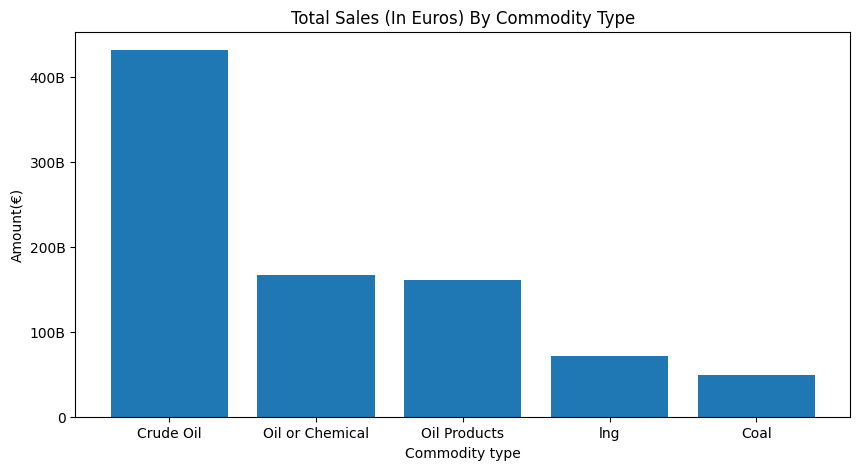

In [25]:

# Visualizing the number of tonnes in total shipped for each commodity type
commodity_by_purchase_price = df.groupby('commodity').sum()['value_eur'].sort_values(ascending=False)

# Create a bar chart of the grouped data
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(commodity_by_purchase_price.index, commodity_by_purchase_price.values)
plt.title('Total Sales (In Euros) By Commodity Type')
plt.xlabel('Commodity type')
plt.ylabel('Amount(€)')

# Define a custom formatting function for the y-axis labels
def format_func(value, _):
    if value >= 1e9:
        return f'{value/1e9:.0f}B'
    elif value >= 1e6:
        return f'{value/1e6:.0f}M'
    elif value >= 1e3:
        return f'{value/1e3:.0f}K'
    else:
        return f'{value:.0f}'

# Apply the custom formatting function to the y-axis labels
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

plt.show()


In [26]:
#defining a function that extracts the month and year 

def format_month_year(df, column):
    # Extract the month and year from the datetime column
    df['month_year'] = df[column].dt.strftime('%B %Y')
    
    return df['month_year']

# applying the function on both 'departure_date_utc' and 'arrival_date_utc'
df['departure_month_year'] = format_month_year(df, 'departure_date_utc')
df['arrival_month_year'] = format_month_year(df, 'arrival_date_utc')

# viewing the updated dataframe
df

,departure_date_utc,arrival_date_utc,status,commodity_origin_iso2,commodity_destination_iso2,commodity_destination_region,commodity,value_tonne,value_eur,month_year,departure_month_year,arrival_month_year
0,2022-01-20 04:34:00+00:00,2022-01-26 15:32:00+00:00,completed,RU,RU,Others,Oil or Chemical,6670.0,3.777081e+06,January 2022,January 2022,January 2022
1,2022-01-20 02:12:00+00:00,2022-02-01 12:03:00+00:00,completed,KZ,ES,EU,Crude Oil,115831.0,6.538241e+07,February 2022,January 2022,February 2022
2,2022-01-19 19:57:00+00:00,2022-01-27 20:41:00+00:00,completed,RU,TR,Turkey,Oil or Chemical,6573.0,3.942407e+06,January 2022,January 2022,January 2022
3,2022-01-19 15:06:00+00:00,2022-01-24 14:24:00+00:00,completed,RU,PL,EU,Oil or Chemical,38734.0,2.419163e+07,January 2022,January 2022,January 2022
4,2022-01-19 13:43:00+00:00,2022-01-27 16:01:00+00:00,completed,RU,FR,EU,Oil or Chemical,40149.0,2.507538e+07,January 2022,January 2022,January 2022
...,...,...,...,...,...,...,...,...,...,...,...,...
30624,2023-05-16 09:39:00+00:00,NaT,ongoing,TR,MD,Others,Oil or Chemical,7084.0,3.926385e+06,NaN,May 2023,NaN
30625,2023-05-23 13:03:00+00:00,NaT,ongoing,RU,JP,Others,lng,78311.0,3.423389e+07,NaN,May 2023,NaN
30626,2023-05-23 16:52:00+00:00,NaT,ongoing,RU,NaN,NaN,Oil Products,7017.0,3.784801e+06,NaN,May 2023,NaN
30627,2023-05-23 16:41:00+00:00,NaT,ongoing,RU,CN,China,Coal,75390.0,1.242932e+07,NaN,May 2023,NaN


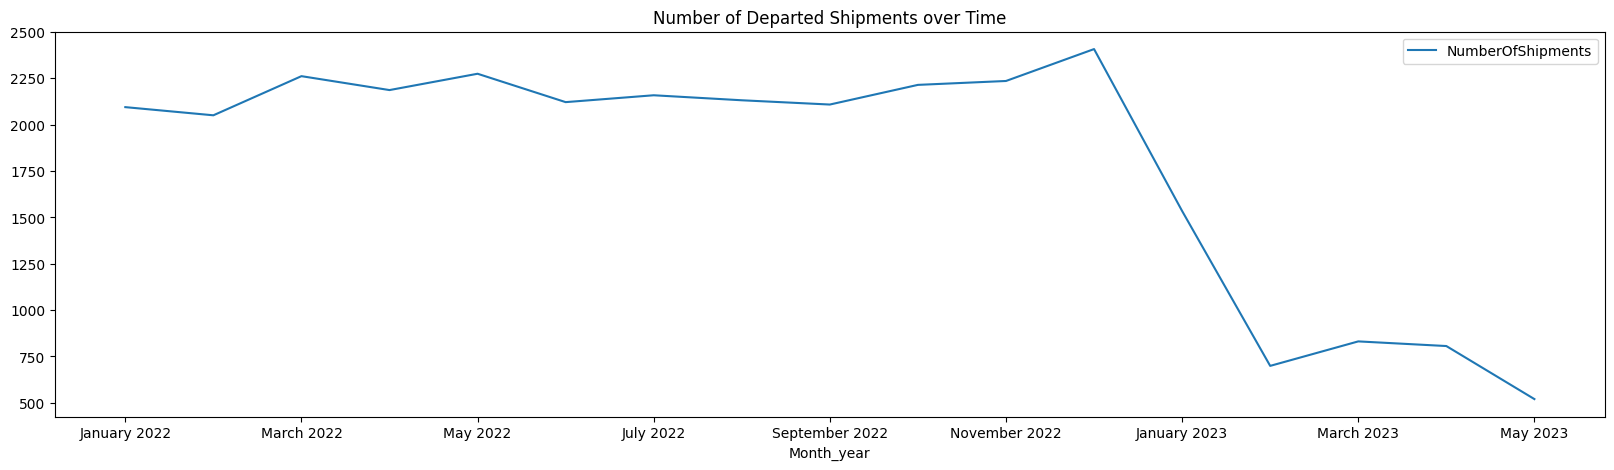

In [27]:
#visualising the number of departed shipments over time 

#counting the number of departed shipments 
departed_shipment_count_by_month = df['departure_month_year'].value_counts()

#converting the list to a dataframe
departed_shipment_count_by_month =  departed_shipment_count_by_month.to_frame()

#resetting index column
departed_shipment_count_by_month = departed_shipment_count_by_month.reset_index(level=0)

#renaming the columns 
departed_shipment_count_by_month = departed_shipment_count_by_month.rename(columns={'index': 'Month_year', 'departure_month_year': 'NumberOfShipments'})

#creating custom order to sort the dataframe by time
custom_order = ['January 2022', 'February 2022', 'March 2022', 'April 2022', 'May 2022', 'June 2022', 'July 2022', 'August 2022', 'September 2022', 'October 2022','November 2022', 'December 2022', 'January 2023', 'February 2023', 'March 2023', 'April 2023', 'May 2023']

#sort the Series by the custom order of values
departed_shipment_count_by_month = departed_shipment_count_by_month.sort_values(by=['Month_year'],key=lambda x: x.map({v: i for i, v in enumerate(custom_order)}))

# Plot the line chart
departed_shipment_count_by_month.plot(x='Month_year', y='NumberOfShipments', kind='line', figsize=(20, 5))

# Set the title of the chart
plt.title('Number of Departed Shipments over Time')

# Display the chart
plt.show()

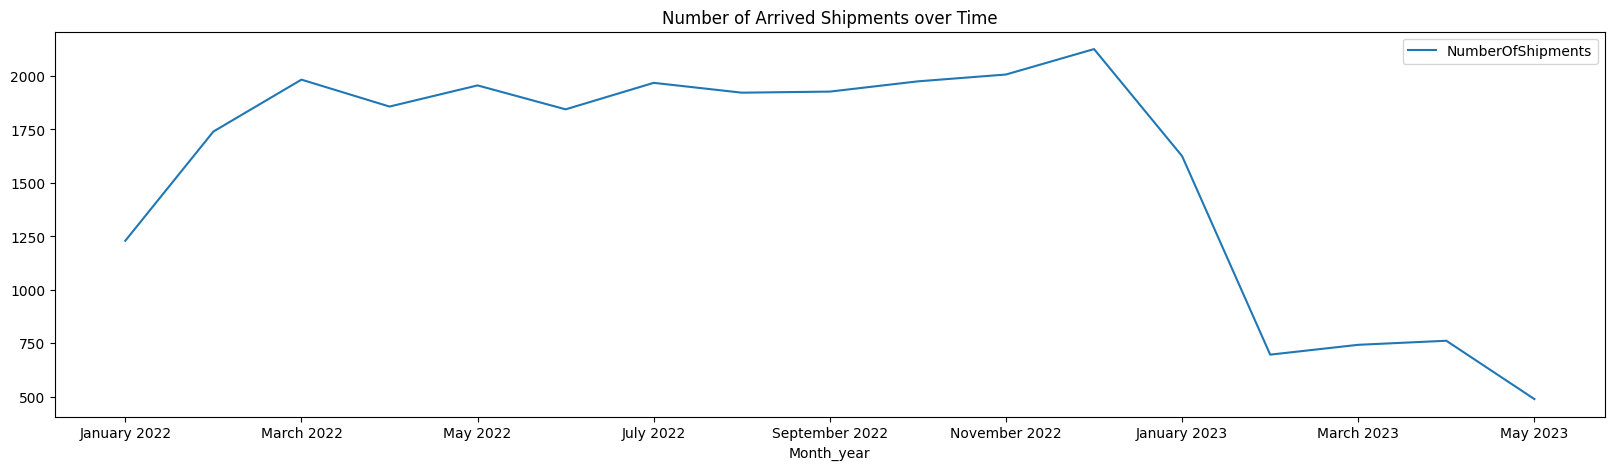

In [28]:

#visualising the number of arrived shipments over time 

#counting the number of departed shipments 
arrived_shipment_count_by_month = df['arrival_month_year'].value_counts()

#converting the list to a dataframe
arrived_shipment_count_by_month =  arrived_shipment_count_by_month.to_frame()

#resetting index column
arrived_shipment_count_by_month = arrived_shipment_count_by_month.reset_index(level=0)

#renaming the columns 
arrived_shipment_count_by_month = arrived_shipment_count_by_month.rename(columns={'index': 'Month_year', 'arrival_month_year': 'NumberOfShipments'})

#creating custom order to sort the dataframe by time
custom_order = ['January 2022', 'February 2022', 'March 2022', 'April 2022', 'May 2022', 'June 2022', 'July 2022', 'August 2022', 'September 2022', 'October 2022','November 2022', 'December 2022', 'January 2023', 'February 2023', 'March 2023', 'April 2023', 'May 2023']

#sort the Series by the custom order of values
arrived_shipment_count_by_month = arrived_shipment_count_by_month.sort_values(by=['Month_year'],key=lambda x: x.map({v: i for i, v in enumerate(custom_order)}))

# Plot the line chart
arrived_shipment_count_by_month.plot(x='Month_year', y='NumberOfShipments', kind='line', figsize=(20, 5))

# Set the title of the chart
plt.title('Number of Arrived Shipments over Time')

# Display the chart
plt.show()

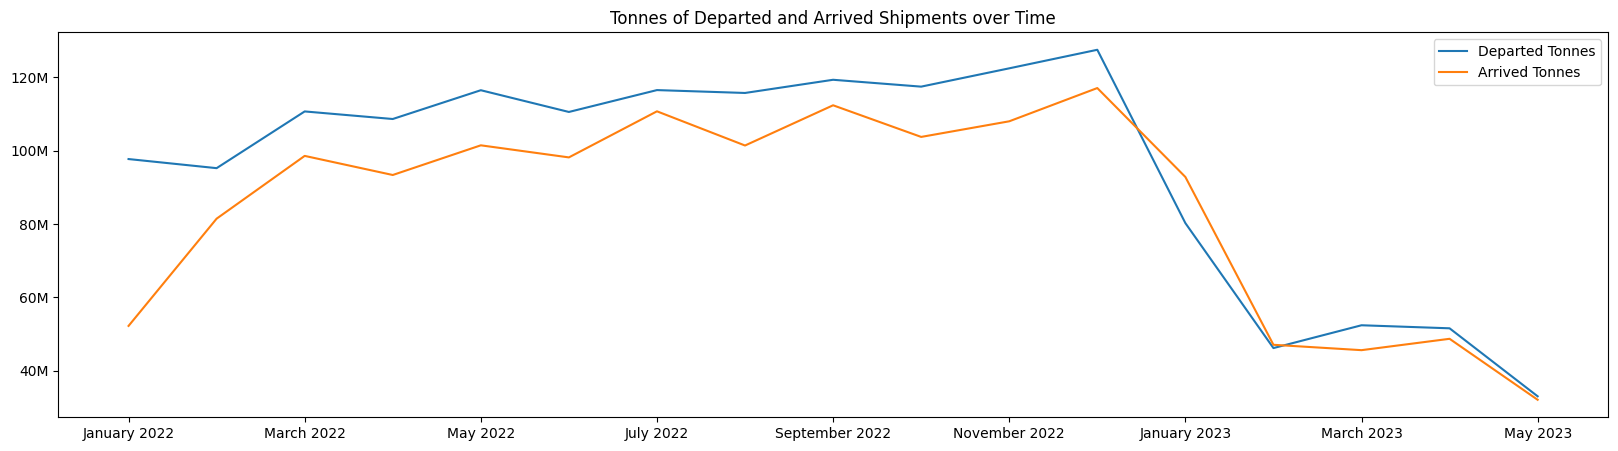

In [29]:

# Plotting the tonnes of departed and arrived shipments over time 

# Obtaining the sum of departed tonnes by 'month_year'
tonnesbytime = df.groupby('departure_month_year').sum()['value_tonne']
tonnesbytime = tonnesbytime.to_frame()
tonnesbytime = tonnesbytime.reset_index(level=0)

# Obtaining the sum of arrived tonnes by 'month_year'
arrivedtonnesbytime = df.groupby('arrival_month_year').sum()['value_tonne']
arrivedtonnesbytime = arrivedtonnesbytime.to_frame()
arrivedtonnesbytime = arrivedtonnesbytime.reset_index(level=0)

# Sort the dataframe by 'departure_month_year' in a custom order
custom_order = ['January 2022', 'February 2022', 'March 2022', 'April 2022', 'May 2022', 'June 2022', 'July 2022', 'August 2022', 'September 2022', 'October 2022','November 2022', 'December 2022', 'January 2023', 'February 2023', 'March 2023', 'April 2023', 'May 2023']

tonnesbytime['departure_month_year'] = pd.Categorical(tonnesbytime['departure_month_year'], categories=custom_order, ordered=True)
tonnesbytime = tonnesbytime.sort_values('departure_month_year')

arrivedtonnesbytime['arrival_month_year'] = pd.Categorical(arrivedtonnesbytime['arrival_month_year'], categories=custom_order, ordered=True)
arrivedtonnesbytime = arrivedtonnesbytime.sort_values('arrival_month_year')

# Plot the line chart
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(tonnesbytime['departure_month_year'], tonnesbytime['value_tonne'], label='Departed Tonnes')
ax.plot(arrivedtonnesbytime['arrival_month_year'], arrivedtonnesbytime['value_tonne'], label='Arrived Tonnes')

# Set the title of the chart
plt.title('Tonnes of Departed and Arrived Shipments over Time')

# Format the y-axis labels to display in the desired format
def format_func(value, _):
    if value >= 1e9:
        return f'{value/1e9:.0f}B'
    elif value >= 1e6:
        return f'{value/1e6:.0f}M'
    elif value >= 1e3:
        return f'{value/1e3:.0f}K'
    else:
        return f'{value:.0f}'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

n = 2  # Change this value as desired to show labels at a specific interval
plt.xticks(range(0, len(tonnesbytime), n), tonnesbytime['departure_month_year'][::n])

# Add a legend for easy distinction
plt.legend()

# Display the chart
plt.show()


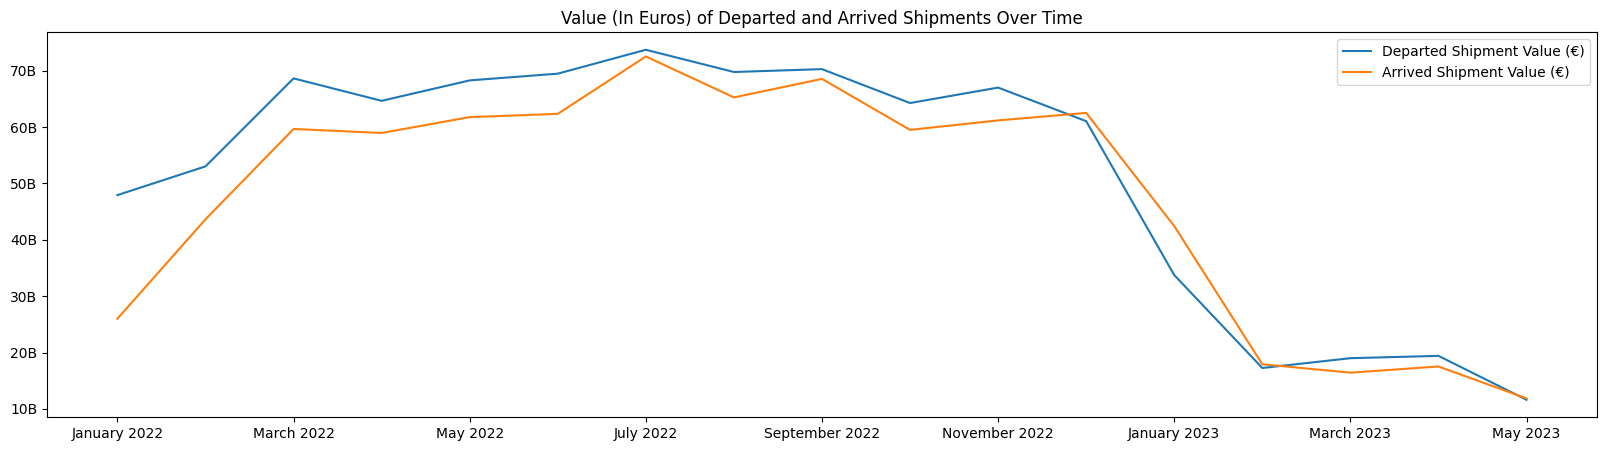

In [30]:

# Plotting the tonnes of departed and arrived shipments over time 

# Obtaining the value of departed shipment in euros by 'month_year'
shipmentvaluebytime = df.groupby('departure_month_year').sum()['value_eur']
shipmentvaluebytime = shipmentvaluebytime.to_frame()
shipmentvaluebytime = shipmentvaluebytime.reset_index(level=0)

# Obtaining the total value of arrived shipments by 'month_year'
arrivedvaluebytime = df.groupby('arrival_month_year').sum()['value_eur']
arrivedvaluebytime = arrivedvaluebytime.to_frame()
arrivedvaluebytime = arrivedvaluebytime.reset_index(level=0)

# Sort the dataframes using a custom order
custom_order = ['January 2022', 'February 2022', 'March 2022', 'April 2022', 'May 2022', 'June 2022', 'July 2022', 'August 2022', 'September 2022', 'October 2022','November 2022', 'December 2022', 'January 2023', 'February 2023', 'March 2023', 'April 2023', 'May 2023']

shipmentvaluebytime['departure_month_year'] = pd.Categorical(shipmentvaluebytime['departure_month_year'], categories=custom_order, ordered=True)
shipmentvaluebytime = shipmentvaluebytime.sort_values('departure_month_year')

arrivedvaluebytime['arrival_month_year'] = pd.Categorical(arrivedvaluebytime['arrival_month_year'], categories=custom_order, ordered=True)
arrivedvaluebytime = arrivedvaluebytime.sort_values('arrival_month_year')

# Plot the line chart
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(shipmentvaluebytime['departure_month_year'], shipmentvaluebytime['value_eur'], label='Departed Shipment Value (€)')
ax.plot(arrivedvaluebytime['arrival_month_year'], arrivedvaluebytime['value_eur'], label='Arrived Shipment Value (€)')

# Set the title of the chart
plt.title('Value (In Euros) of Departed and Arrived Shipments Over Time')

# Format the y-axis labels to display in the desired format
def format_func(value, _):
    if value >= 1e9:
        return f'{value/1e9:.0f}B'
    elif value >= 1e6:
        return f'{value/1e6:.0f}M'
    elif value >= 1e3:
        return f'{value/1e3:.0f}K'
    else:
        return f'{value:.0f}'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

n = 2  # Change this value as desired to show labels at a specific interval
plt.xticks(range(0, len(shipmentvaluebytime), n), shipmentvaluebytime['departure_month_year'][::n])

# Add a legend for easy distinction
plt.legend()

# Display the chart
plt.show()


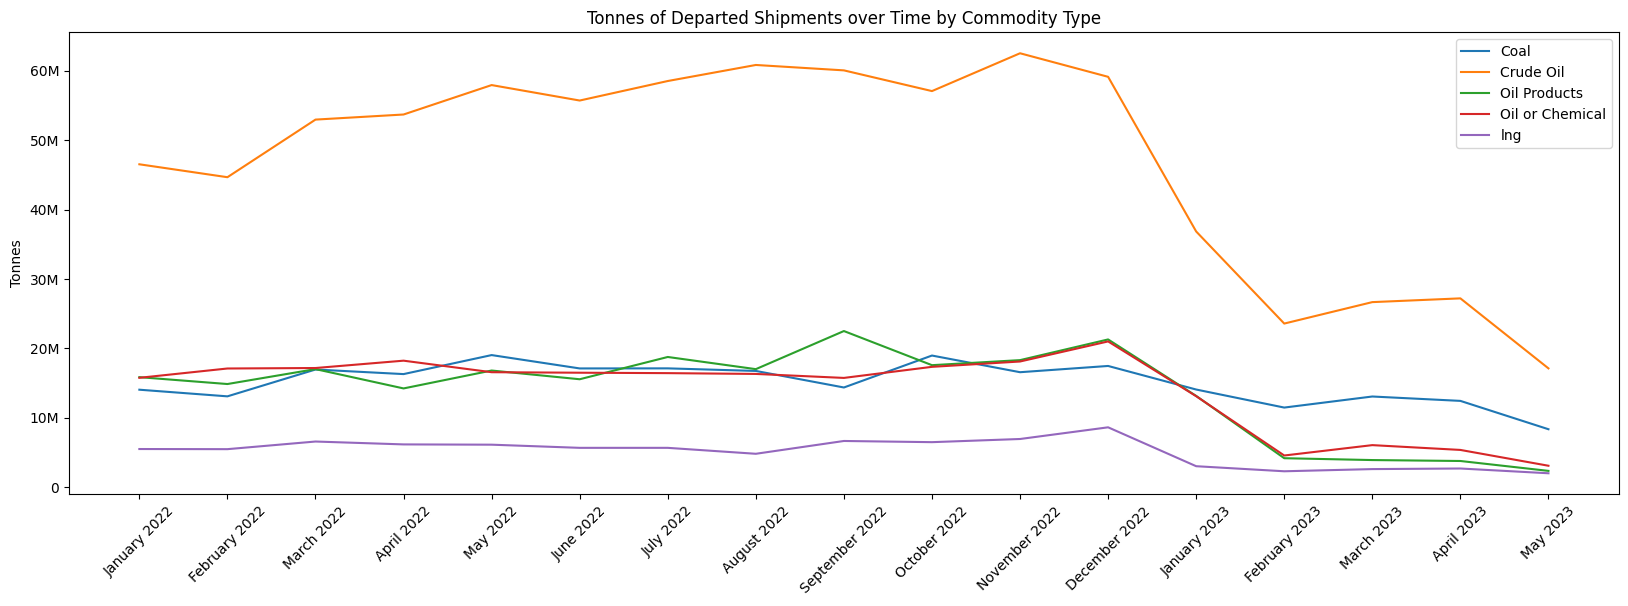

In [31]:
# visualising the tonnes of the departed commodity  types purchased over time

# Convert 'departure_month_year' to a categorical data type with the custom order
df['departure_month_year'] = pd.Categorical(df['departure_month_year'], categories=custom_order, ordered=True)

# Group the data by 'commodity' and 'departure_month_year' and calculate the sum of 'value_tonne'
# Group the data by 'commodity' and 'departure_month_year' and calculate the sum of 'value_tonne'
grouped_data = df.groupby(['commodity', 'departure_month_year']).sum()['value_tonne']

# Create a line chart for each commodity
fig, ax = plt.subplots(figsize=(20, 6))
for commodity, data in grouped_data.groupby('commodity'):
    ax.plot(data.index.get_level_values('departure_month_year'), data.values, label=commodity)




# Set the title and labels of the chart
plt.title('Tonnes of Departed Shipments over Time by Commodity Type')
plt.ylabel('Tonnes')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Format the y-axis labels to display in the desired format
def format_func(value, _):
    if value >= 1e9:
        return f'{value/1e9:.0f}B'
    elif value >= 1e6:
        return f'{value/1e6:.0f}M'
    elif value >= 1e3:
        return f'{value/1e3:.0f}K'
    else:
        return f'{value:.0f}'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

# Add a legend to differentiate commodities
plt.legend()

# Display the chart
plt.show()


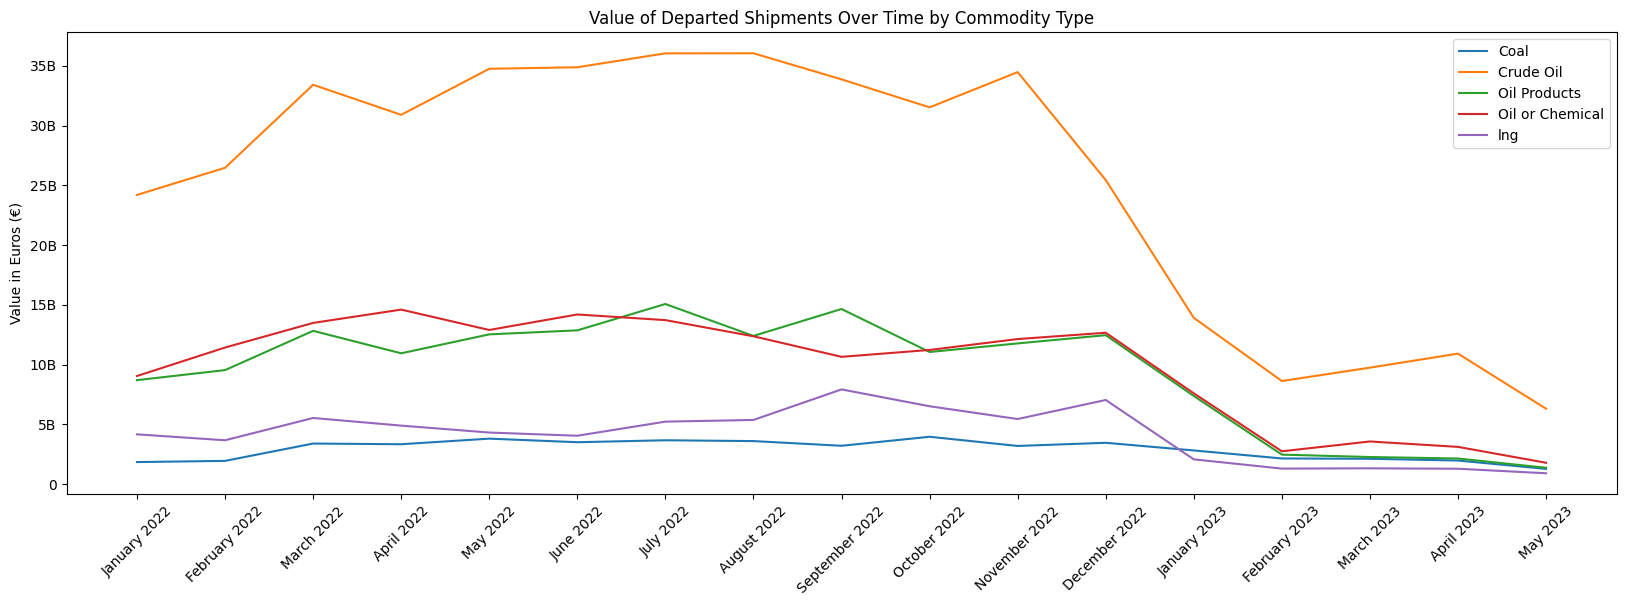

In [32]:
# visualising the value of the departed commodity  types purchased over time

# Group the data by 'commodity' and 'departure_month_year' and calculate the sum of 'value_eur'
grouped_data = df.groupby(['commodity', 'departure_month_year']).sum()['value_eur']

# Create a line chart for each commodity
fig, ax = plt.subplots(figsize=(20, 6))
for commodity, data in grouped_data.groupby('commodity'):
    ax.plot(data.index.get_level_values('departure_month_year'), data.values, label=commodity)




# Set the title and labels of the chart
plt.title('Value of Departed Shipments Over Time by Commodity Type')
plt.ylabel('Value in Euros (€)')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Format the y-axis labels to display in the desired format
def format_func(value, _):
    if value >= 1e9:
        return f'{value/1e9:.0f}B'
    elif value >= 1e6:
        return f'{value/1e6:.0f}M'
    elif value >= 1e3:
        return f'{value/1e3:.0f}K'
    else:
        return f'{value:.0f}'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

# Add a legend to differentiate commodities
plt.legend()

# Display the chart
plt.show()


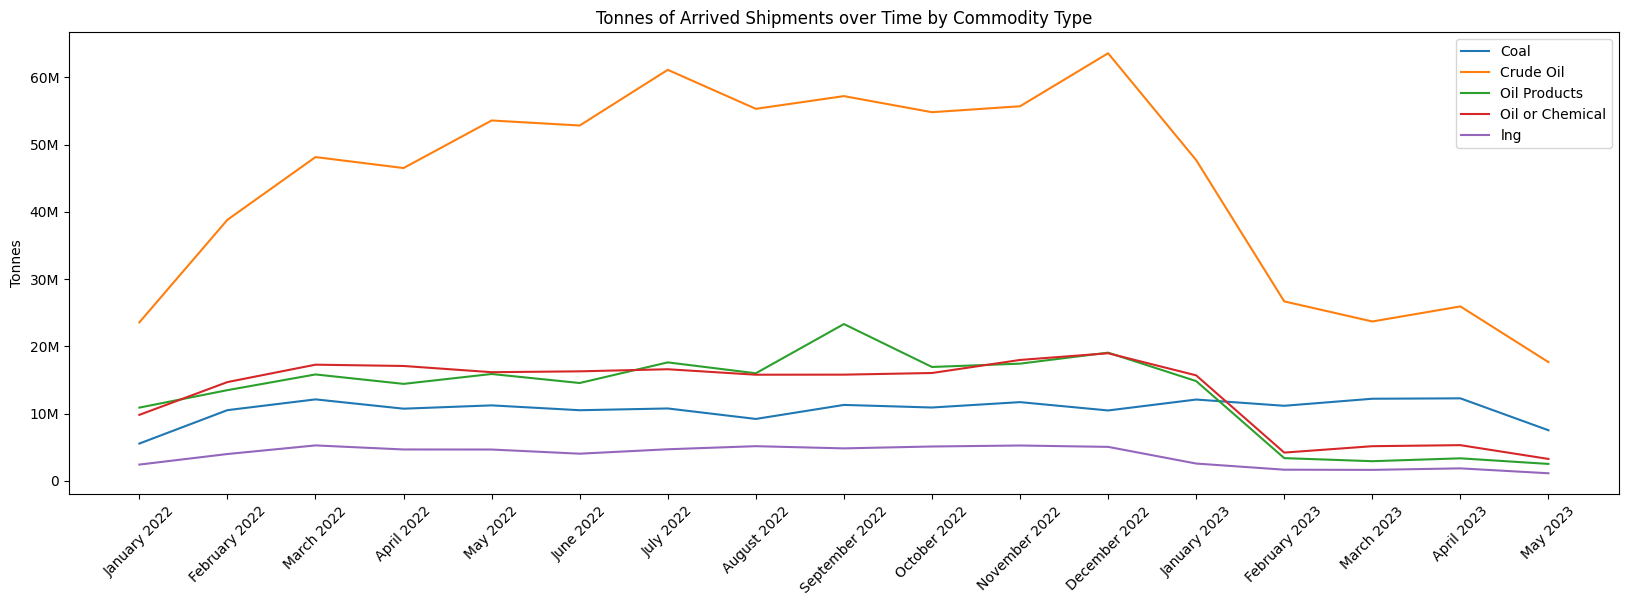

In [33]:
# visualising the tonnes of the arrived commodity  types purchased over time

# Convert 'arrival_month_year' to a categorical data type with the custom order
df['arrival_month_year'] = pd.Categorical(df['arrival_month_year'], categories=custom_order, ordered=True)

# Group the data by 'commodity' and 'arrival_month_year' and calculate the sum of 'value_tonne'
grouped_data = df.groupby(['commodity', 'arrival_month_year']).sum()['value_tonne']

# Create a line chart for each commodity
fig, ax = plt.subplots(figsize=(20, 6))
for commodity, data in grouped_data.groupby('commodity'):
    ax.plot(data.index.get_level_values('arrival_month_year'), data.values, label=commodity)




# Set the title and labels of the chart
plt.title('Tonnes of Arrived Shipments over Time by Commodity Type')
plt.ylabel('Tonnes')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Format the y-axis labels to display in the desired format
def format_func(value, _):
    if value >= 1e9:
        return f'{value/1e9:.0f}B'
    elif value >= 1e6:
        return f'{value/1e6:.0f}M'
    elif value >= 1e3:
        return f'{value/1e3:.0f}K'
    else:
        return f'{value:.0f}'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

# Add a legend to differentiate commodities
plt.legend()

# Display the chart
plt.show()


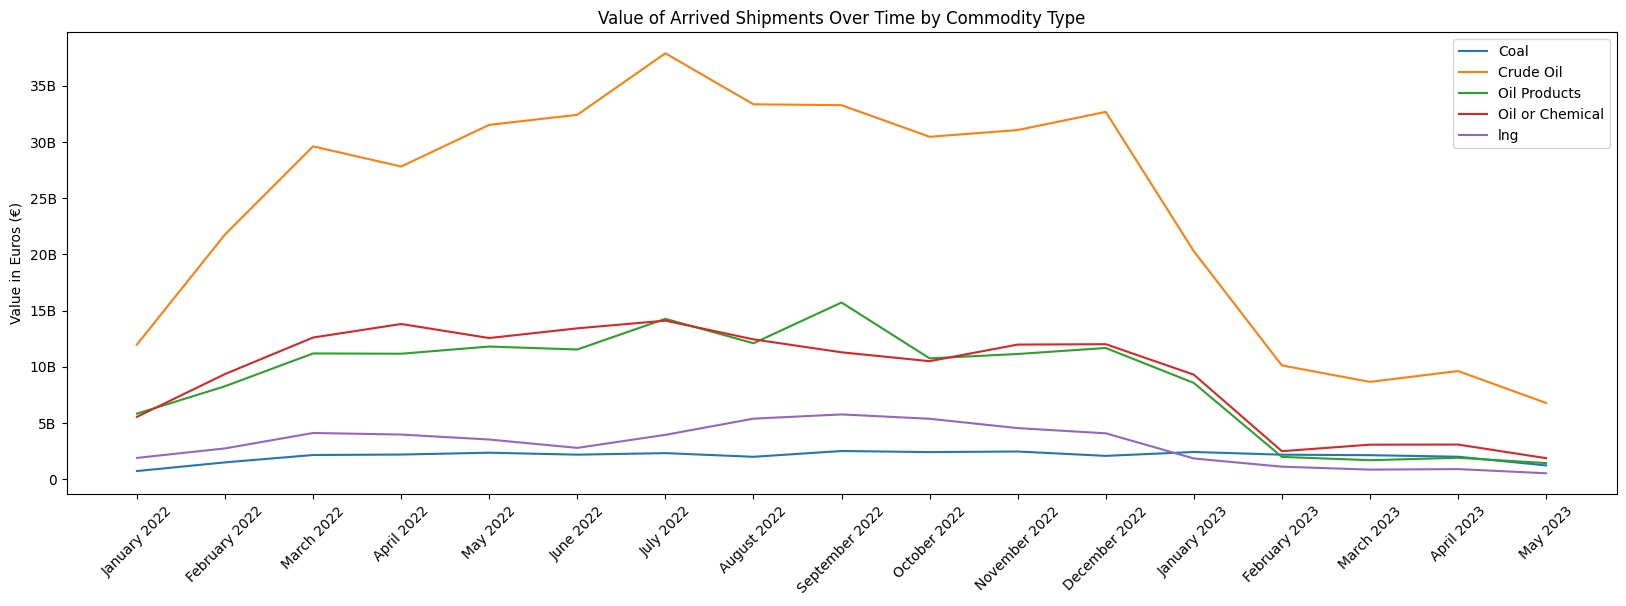

In [34]:
# visualising the value of the arrived commodity  types purchased over time

# Group the data by 'commodity' and 'departure_month_year' and calculate the sum of 'value_eur'
grouped_data = df.groupby(['commodity', 'arrival_month_year']).sum()['value_eur']

# Create a line chart for each commodity
fig, ax = plt.subplots(figsize=(20, 6))
for commodity, data in grouped_data.groupby('commodity'):
    ax.plot(data.index.get_level_values('arrival_month_year'), data.values, label=commodity)




# Set the title and labels of the chart
plt.title('Value of Arrived Shipments Over Time by Commodity Type')
plt.ylabel('Value in Euros (€)')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Format the y-axis labels to display in the desired format
def format_func(value, _):
    if value >= 1e9:
        return f'{value/1e9:.0f}B'
    elif value >= 1e6:
        return f'{value/1e6:.0f}M'
    elif value >= 1e3:
        return f'{value/1e3:.0f}K'
    else:
        return f'{value:.0f}'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

# Add a legend to differentiate commodities
plt.legend()

# Display the chart
plt.show()


In [35]:
df['commodity_origin_iso2'].value_counts()

RU    11782
CN     7602
MY     3828
AE     2895
TR     1769
IN     1280
EG      781
KZ      656
HK       36
Name: commodity_origin_iso2, dtype: int64

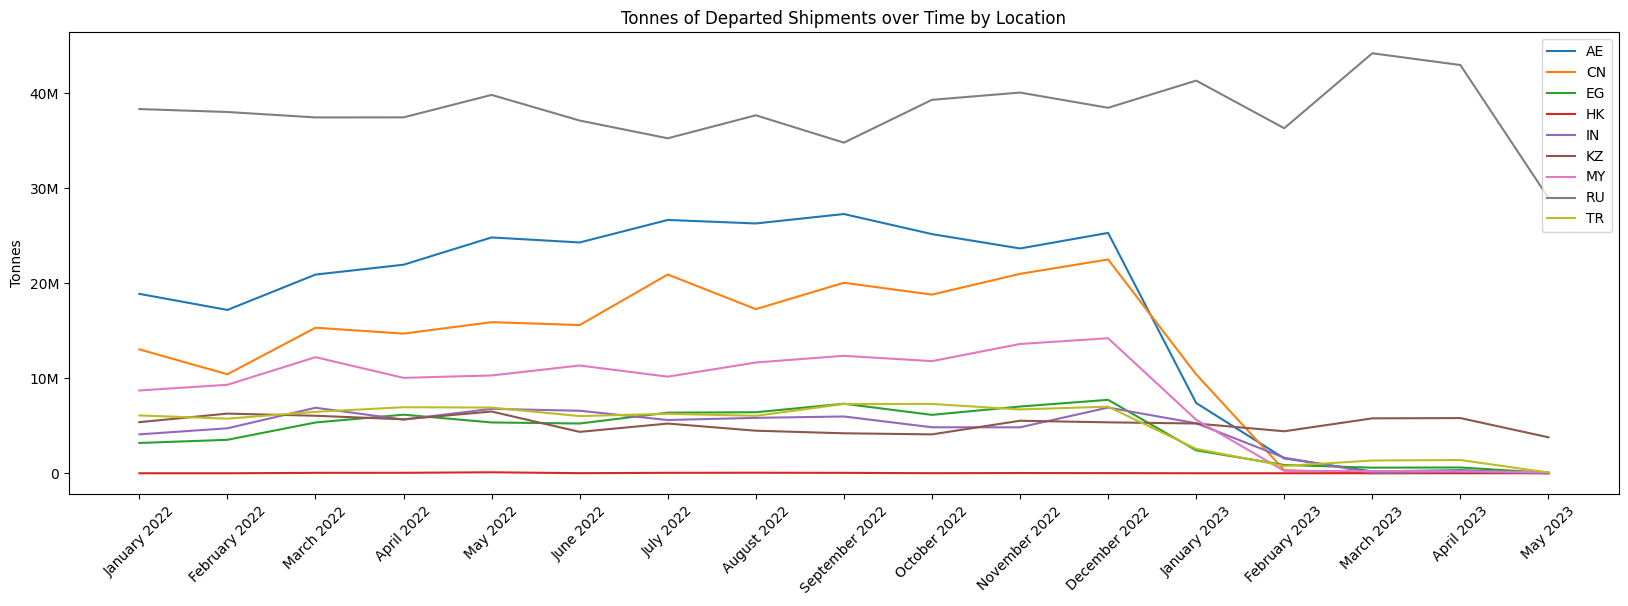

In [36]:
# visualising the tonnes of the departed shipment by location over time

# Convert 'departure_month_year' to a categorical data type with the custom order
df['departure_month_year'] = pd.Categorical(df['departure_month_year'], categories=custom_order, ordered=True)

# Group the data by 'commodity_origin_iso2' and 'departure_month_year' and calculate the sum of 'value_tonne'
# Group the data by 'commodity_origin_iso2' and 'departure_month_year' and calculate the sum of 'value_tonne'
grouped_data = df.groupby(['commodity_origin_iso2', 'departure_month_year']).sum()['value_tonne']

# Create a line chart for each commodity_origin_iso2
fig, ax = plt.subplots(figsize=(20, 6))
for commodity_origin_iso2, data in grouped_data.groupby('commodity_origin_iso2'):
    ax.plot(data.index.get_level_values('departure_month_year'), data.values, label=commodity_origin_iso2)




# Set the title and labels of the chart
plt.title('Tonnes of Departed Shipments over Time by Location')
plt.ylabel('Tonnes')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Format the y-axis labels to display in the desired format
def format_func(value, _):
    if value >= 1e9:
        return f'{value/1e9:.0f}B'
    elif value >= 1e6:
        return f'{value/1e6:.0f}M'
    elif value >= 1e3:
        return f'{value/1e3:.0f}K'
    else:
        return f'{value:.0f}'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

# Add a legend to differentiate commodities
plt.legend()

# Display the chart
plt.show()


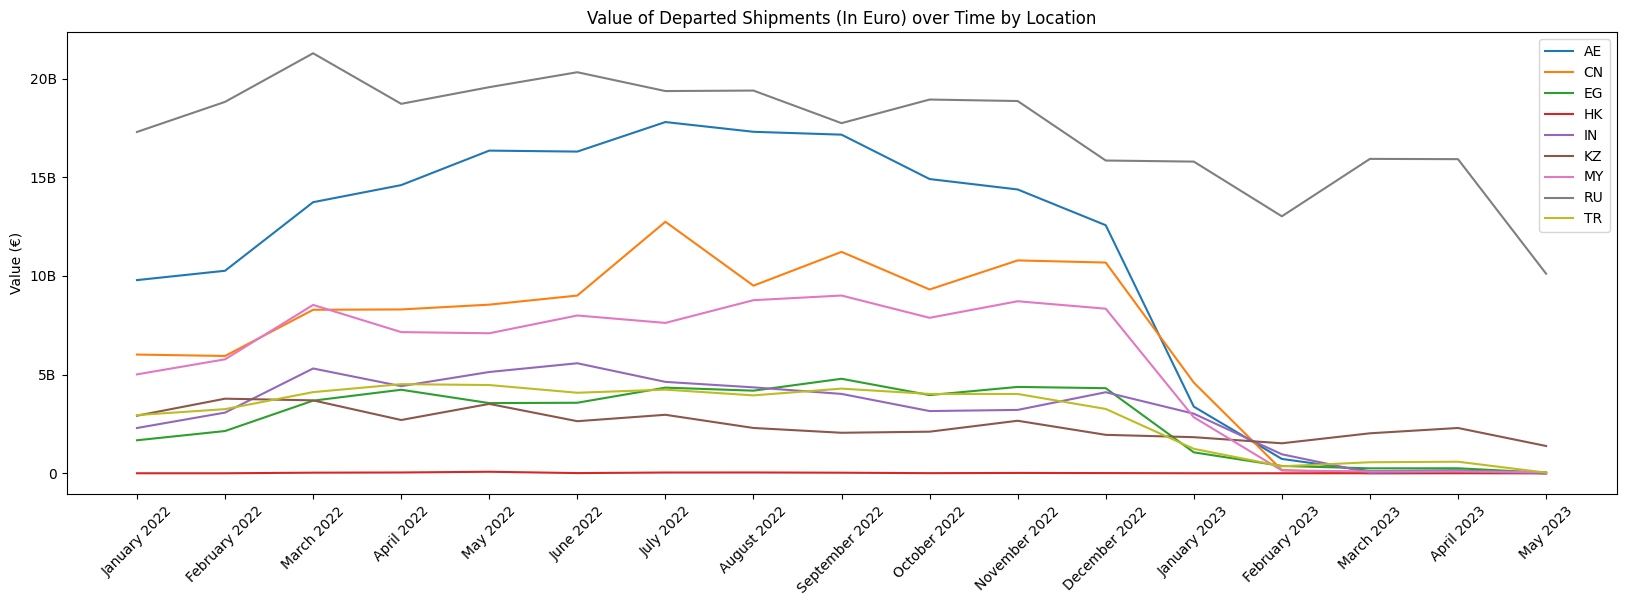

In [37]:
# visualising the value of departed shipment by location over time

# Convert 'departure_month_year' to a categorical data type with the custom order
df['departure_month_year'] = pd.Categorical(df['departure_month_year'], categories=custom_order, ordered=True)

# Group the data by 'commodity_origin_iso2' and 'departure_month_year' and calculate the sum of 'value_eur'
# Group the data by 'commodity_origin_iso2' and 'departure_month_year' and calculate the sum of 'value_eur'
grouped_data = df.groupby(['commodity_origin_iso2', 'departure_month_year']).sum()['value_eur']

# Create a line chart for each commodity_origin_iso2
fig, ax = plt.subplots(figsize=(20, 6))
for commodity_origin_iso2, data in grouped_data.groupby('commodity_origin_iso2'):
    ax.plot(data.index.get_level_values('departure_month_year'), data.values, label=commodity_origin_iso2)




# Set the title and labels of the chart
plt.title('Value of Departed Shipments (In Euro) over Time by Location')
plt.ylabel('Value (€)')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Format the y-axis labels to display in the desired format
def format_func(value, _):
    if value >= 1e9:
        return f'{value/1e9:.0f}B'
    elif value >= 1e6:
        return f'{value/1e6:.0f}M'
    elif value >= 1e3:
        return f'{value/1e3:.0f}K'
    else:
        return f'{value:.0f}'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

# Add a legend to differentiate commodities
plt.legend()

# Display the chart
plt.show()
